In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel, convolve, convolve_fft
from astropy.visualization import imshow_norm, MinMaxInterval, SqrtStretch
import pyfftw.interfaces.numpy_fft as fft
fn = '../data/1551210093509O-result.csv' #stars in pi deg^2
dataset = Table.read(fn, )


In [2]:
%run ../code/nimsuv2.py

In [23]:
# you'll want to oversize the image and cut down later
# 7.86 fhwh
# 3.93
# 12.8 -> 13.8 micron spot size

jitter_1sigma = 0.3
psf_std = 7.86 / 2.355 #  fwhm to std
image_shape = (23, 23)
throughput = 0.8
QE = 0.5
arcsec_per_pixel = 3.93
target_mag = 21.

bg_star_magnitudes = dataset['phot_g_mean_mag']
rstate = 8675309

I = ImageSimulation(texp=60, lam=0.325, dlam=0.15, psf_oversample=10, image_shape=image_shape,
                    ncoadds=10, jitter=jitter_1sigma, psf_shape=[psf_std, psf_std, 0],
                    throughput=throughput, bg_star_magnitudes=bg_star_magnitudes, rstate=rstate,
                    target_mag=target_mag, arcsec_per_pixel=arcsec_per_pixel, QE=QE,
                    black=0.1, zodi=4.e-7)



In [24]:
science_img = I.make_science_image(rstate=rstate)
ref_img = I.make_reference_image()

In [25]:
kernel = Gaussian2DKernel(x_stddev=jitter_1sigma/I.arcsec_per_pix.value,
                          y_stddev=jitter_1sigma/I.arcsec_per_pix.value, mode='oversample', )
ref_img_conv = convolve_fft(ref_img, kernel, normalize_kernel=True)

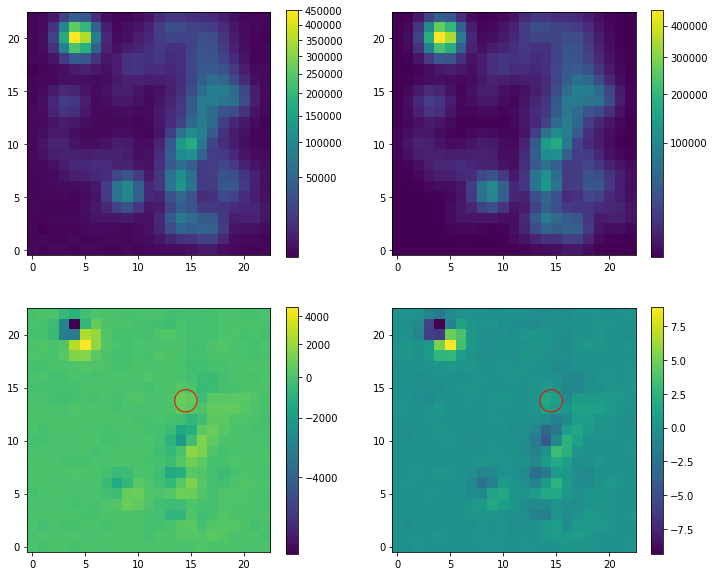

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,10])
ax = axes.flatten()[0]
# im = ax.imshow(bg_img, origin='lower', interpolation='nearest')
im, norm = imshow_norm(science_img, ax, origin='lower',
                       interval=MinMaxInterval(), stretch=SqrtStretch())
fig.colorbar(im, ax=ax)
####
ax = axes.flatten()[1]
# im = ax.imshow(bg_img_noiseless_conv, origin='lower', interpolation='nearest')
im, norm = imshow_norm(ref_img, ax, origin='lower',
                       interval=MinMaxInterval(), stretch=SqrtStretch())
fig.colorbar(im, ax=ax)
####
ax = axes.flatten()[2]
im, norm = imshow_norm(science_img - ref_img_conv, ax, origin='lower',
                       interval=MinMaxInterval(), stretch=SqrtStretch())
ax.scatter(I.table_targets['y_mean'][0], I.table_targets['x_mean'][0],
            marker='o', color='None', edgecolors='r', s=500)
fig.colorbar(im, ax=ax)
####
ax = axes.flatten()[3]
im, norm = imshow_norm((science_img - ref_img_conv) / np.std(science_img - ref_img_conv),
                       ax, origin='lower',
                       interval=MinMaxInterval())
ax.scatter(I.table_targets['y_mean'][0], I.table_targets['x_mean'][0],
            marker='o', color='None', edgecolors='r', s=500)
fig.colorbar(im, ax=ax)

# fig.show(im)

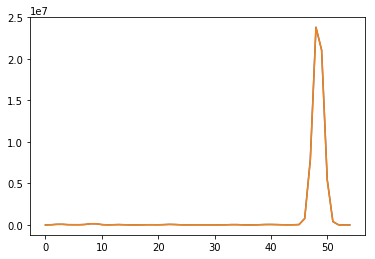

In [30]:
plt.plot(science_img[41])
plt.plot(ref_img[41])

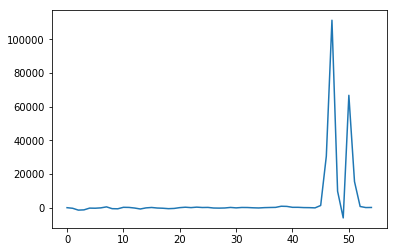

In [31]:
plt.plot(science_img[41] - ref_img[41])

In [32]:
import astroalign as aa
aligned_image = aa.register(ref_img_conv, science_img, )
aa.

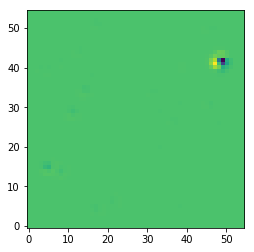

In [33]:
im, norm = imshow_norm(science_img - aligned_image, origin='lower',
                       interval=MinMaxInterval(), stretch=SqrtStretch())

In [27]:
I.table_bgstars

flux,x_mean,y_mean,x_stddev,y_stddev,theta
,,,,,rad
float64,float64,float64,float64,float64,float64
30154.73385142356,14.320102758632448,18.813625408317634,0.8492569002123143,0.8492569002123143,0.0
11438.63756962423,9.170386864742614,14.151353733830101,0.8492569002123143,0.8492569002123143,0.0
640.4096975481241,13.100174656852435,15.185712582893895,0.8492569002123143,0.8492569002123143,0.0
4260.685711005112,16.942811476997733,18.331575726196974,0.8492569002123143,0.8492569002123143,0.0
1948.7274364428272,9.30711101497464,8.316915704013361,0.8492569002123143,0.8492569002123143,0.0
1828.131785320978,6.8430491392477455,20.44303190776919,0.8492569002123143,0.8492569002123143,0.0
5461.479397604027,11.858186554959135,16.87789596531742,0.8492569002123143,0.8492569002123143,0.0
3983.8914785025036,8.568499544333662,17.672614170966554,0.8492569002123143,0.8492569002123143,0.0
